# **CHECKPOINT 2:** SIMPLE MONTE CARLO GENERATION OF PSEUDO EXPERIMENTS 

## s1867522

In [70]:
# libraries used
import numpy as np
import matplotlib.pyplot as plt
import math

## **PART 1:** SIMULATING 1000 MUON DECAYS

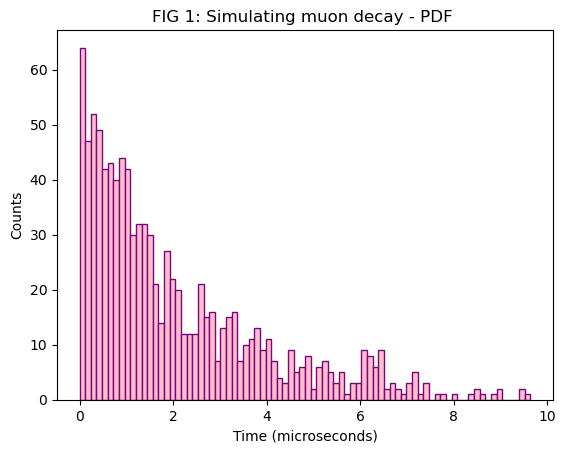

In [71]:


tau = 2.2 # lifetime of the muon in microseconds

n = 1000 # number of points
data_set =  np.random.exponential(tau,n)  # probability distribution 


mask = data_set > 10                    # values that are utside range (0 -> 10) 
count = (data_set>10).sum()             # total of values outside range
data_set = data_set[~mask]              # drop values that are not in the range 

# while loop to append values that were drop
while count > 0:
    np.append(data_set,np.random.exponential(tau,count))

    # repeat process to drop values that are not in the range  until count = 0 (while loop)
    mask = data_set>10
    count = (data_set>10).sum()
    data_set = data_set[~mask]

# plot histogram 
plt.hist(data_set, bins = 80,  color = "pink", ec="purple") #;
plt.xlabel("Time (microseconds)")
plt.ylabel("Counts")
plt.title("FIG 1: Simulating muon decay - PDF ")
plt.show();


## **PART 2:** ESTIMATE THE LIFETIME FROM THE DATA FROM A SINGLE DATA SET

Estimate of lifetime is the average of all measured decay times:

In [72]:
lt_estimate = np.mean(data_set)   # lifetime estimate from distribution
print( "Estimate of lifetime: ", lt_estimate)



Estimate of lifetime:  2.036650140618309


### Compare teh value you find with the know original value of 2.2 microseconds. Have a think about why they are probably not exatly the same? Yu will probably get a value a bit less that 2.2.

The estimate of the lifetime is of around ~2.1 microseconds when running the simulation (close to 2.2 but smaller as expected). This is because the exponential distribution we are using is truncated (we are setting a range of 0 to 10 microseconds), when in reality there will be decays bigger than 10 microseconds (making the lifetime value bigger than what we get with the range).

## **PART 3:** REPEAT 500

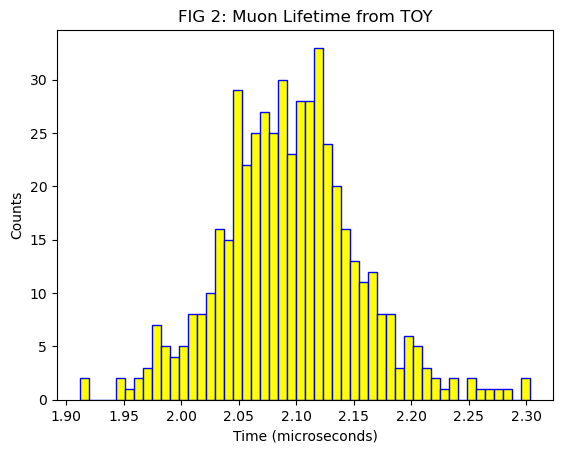

In [73]:
runs = 500    # number of times the experiment is being "run"

lifetimes = []  # list to store the lifetimes calculated at each "experiment"


for i in range(runs):

    tau = 2.2 # lifetime of the muon in microseconds

    n = 1000 # number of points
    data_set =  np.random.exponential(tau,n)  # probability distribution 


    mask = data_set > 10                    # values that are utside range (0 -> 10) 
    count = (data_set>10).sum()             # total of values outside range
    data_set = data_set[~mask]              # drop values that are not in the range 

    # while loop to append values that were drop
    while count > 0:
        np.append(data_set,np.random.exponential(tau,count))

        # repeat process to drop values that are not in the range  until count = 0 (while loop)
        mask = data_set>10
        count = (data_set>10).sum()
        data_set = data_set[~mask]

    lifetime = np.mean(data_set)
    lifetimes.append(lifetime)


#plt.hist(lifetimes, bins = 50);

# plot histogram 
plt.hist(lifetimes, bins = 50,  color = "yellow", ec="blue") #;
plt.xlabel("Time (microseconds)")
plt.ylabel("Counts")
plt.title("FIG 2: Muon Lifetime from TOY")
plt.show();



In [74]:
print("Values from the Gaussian distribution of FIG 2:")
print("Mean of the distribution ", np.mean(lifetimes))
print("Standard deviation: ", np.std(lifetimes))

error_mean = np.std(lifetimes)/math.sqrt(runs)
print("Standard error on the mean: ", error_mean)

Values from the Gaussian distribution of FIG 2:
Mean of the distribution  2.0946224105596047
Standard deviation:  0.059425060160688555
Standard error on the mean:  0.0026575694817262837


### How well (with what numerical precision) can you expect to estimate the true lifetime from any single experiment?

The mean of the Gaussian distribution obtained (FIG 2) give us our "experimental" value of the lifetime of the muon after running it 500 times. The standard deviation of the gaussian gives the numerical precision of the experiment. 
Shown below:

In [75]:
print("Mean of the distribution ", np.mean(lifetimes))
print("Standard deviation (Numerical precission): ", np.std(lifetimes))

Mean of the distribution  2.0946224105596047
Standard deviation (Numerical precission):  0.059425060160688555


### Is the method biased? What is the bias and precision of the bias?

The method is biased, (lifetime_true - lifetime_experimental is not zero, where the lifetime_experimental is given by the mean of the Gaussian distribution). The bias tell us if there is an offset between the lifetime the experiment has calculated and the true lifetime we used as our true value (2.2 microseconds), and we now there is an offset (as explained after **PART 1**, we are truncating by using a range the exponential distribution, which is not true in real experiments). The bias is then given by the difference between the true value adn the experimental value obatined and teh precission of the bias is given by the standard error of the mean of the Gaussian.
Shown below:

In [76]:
bias = tau - np.mean(lifetimes)
print("Bias of the experiment: ", bias)
print("Precision onf the bias: ", error_mean)

Bias of the experiment:  0.10537758944039544
Precision onf the bias:  0.0026575694817262837
